# Securities portfolio modeling
### Kirill Zakharov
#### 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as sts
import yfinance as yf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
plt.style.use('ggplot')

In [35]:
# data import
names = ['SBER.ME','GAZP.ME', 'MTSS.ME', 'MGNT.ME', 'SNGS.ME', 'HYDR.ME', 'AFLT.ME', 'DSKY.ME', 'AAPL', 'IVV']
n = len(names)
data = pd.DataFrame(columns=names)

for name in names:
    
    data[name] = yf.download(name, '2018-01-01', '2021-02-01')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [13]:
df1 = pd.read_csv('quotes.csv', sep='\t', parse_dates=True, index_col='Date')
names = ['SBER.ME','GAZP.ME', 'MTSS.ME', 'MGNT.ME', 'SNGS.ME', 'HYDR.ME', 'AFLT.ME', 'DSKY.ME', 'AAPL', 'IVV']
n = len(names)
n = 10
df1

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL,IVV
Date,,,,,,,,,,
2018-01-03,154.489380,107.051125,197.995163,5095.507324,26.139996,0.638334,127.199066,70.177948,41.373032,255.418671
2018-01-04,159.086075,110.039169,202.738434,5208.654297,26.392916,0.650833,134.899857,71.621933,41.565216,256.524994
2018-01-05,158.952835,111.035172,202.199417,5283.299316,26.435070,0.654023,133.450317,71.621933,42.038452,258.147003
2018-01-09,160.151993,113.367302,203.421158,5185.867676,26.528746,0.654885,136.349426,71.116539,41.877506,259.309631
2018-01-10,158.393234,116.144798,204.427307,5233.011719,26.673941,0.667988,135.262268,71.658035,41.867889,258.897125
...,...,...,...,...,...,...,...,...,...,...
2021-01-25,263.540009,216.380005,333.600006,5101.000000,34.889999,0.787500,70.839996,141.160004,142.706757,384.543671
2021-01-26,267.940002,218.119995,336.100006,5161.000000,34.919998,0.788000,70.599998,142.699997,142.946396,383.975586
2021-01-27,266.700012,218.419998,334.750000,5087.000000,34.330002,0.792000,70.120003,140.240005,141.848038,374.607178


In [3]:
data = df1
data.head()

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL,IVV
Date,,,,,,,,,,
2018-01-03,154.489380,107.051125,197.995163,5095.507324,26.139996,0.638334,127.199066,70.177948,41.373032,255.418671
2018-01-04,159.086075,110.039169,202.738434,5208.654297,26.392916,0.650833,134.899857,71.621933,41.565216,256.524994
2018-01-05,158.952835,111.035172,202.199417,5283.299316,26.435070,0.654023,133.450317,71.621933,42.038452,258.147003
2018-01-09,160.151993,113.367302,203.421158,5185.867676,26.528746,0.654885,136.349426,71.116539,41.877506,259.309631
2018-01-10,158.393234,116.144798,204.427307,5233.011719,26.673941,0.667988,135.262268,71.658035,41.867889,258.897125


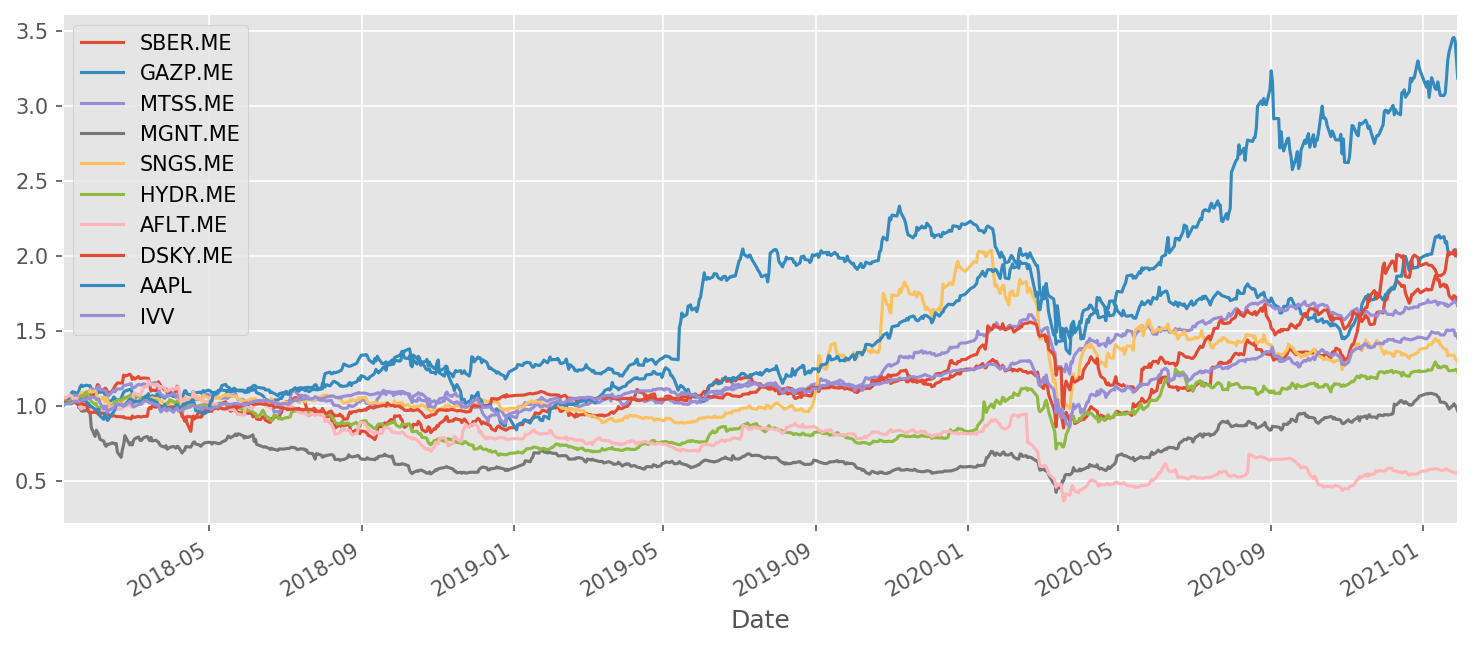

In [4]:
fig, ax = plt.subplots(figsize=(12, 5), dpi=150)
(data.pct_change()+1).cumprod().plot(ax=ax)
plt.show()

## Daily return

In [5]:
return_pct = data.pct_change().apply(lambda x: np.log(1+x))
return_pct.head(4)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL,IVV
Date,,,,,,,,,,
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,0.029320,0.027530,0.023674,0.021962,0.009629,0.019392,0.058779,0.020367,0.004634,0.004322
2018-01-05,-0.000838,0.009011,-0.002662,0.014229,0.001596,0.004889,-0.010803,0.000000,0.011321,0.006303
2018-01-09,0.007516,0.020786,0.006024,-0.018614,0.003537,0.001317,0.021492,-0.007081,-0.003836,0.004494


In [6]:
mean_return = return_pct.mean(skipna=True)
mean_return*100

SBER.ME    0.066873
GAZP.ME    0.089769
MTSS.ME    0.066206
MGNT.ME   -0.004737
SNGS.ME    0.032354
HYDR.ME    0.026097
AFLT.ME   -0.077677
DSKY.ME    0.092079
AAPL       0.150438
IVV        0.048225
dtype: float64

In [7]:
cov_matrix = return_pct.cov()
cov_matrix*100

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL,IVV
SBER.ME,0.041684,0.017026,0.012437,0.012834,0.011700,0.015538,0.018934,0.011657,0.009630,0.009295
GAZP.ME,0.017026,0.029198,0.009434,0.010492,0.014308,0.010507,0.011888,0.006092,0.007413,0.007706
MTSS.ME,0.012437,0.009434,0.017032,0.009011,0.009291,0.008998,0.008309,0.005328,0.007560,0.006645
MGNT.ME,0.012834,0.010492,0.009011,0.038906,0.009633,0.012650,0.010364,0.003936,0.007121,0.007178
SNGS.ME,0.011700,0.014308,0.009291,0.009633,0.039105,0.011925,0.011979,0.006118,0.007615,0.006914
HYDR.ME,0.015538,0.010507,0.008998,0.012650,0.011925,0.030549,0.013865,0.007356,0.008479,0.007978
AFLT.ME,0.018934,0.011888,0.008309,0.010364,0.011979,0.013865,0.052676,0.010575,0.004520,0.006667
DSKY.ME,0.011657,0.006092,0.005328,0.003936,0.006118,0.007356,0.010575,0.027566,0.002942,0.002736
AAPL,0.009630,0.007413,0.007560,0.007121,0.007615,0.008479,0.004520,0.002942,0.048713,0.024790
IVV,0.009295,0.007706,0.006645,0.007178,0.006914,0.007978,0.006667,0.002736,0.024790,0.020953


## Monthly return

In [8]:
#monthly return
new_data = data.resample('M').last().pct_change()
new_data.head(4)

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL,IVV
Date,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,0.029868,-0.001395,-0.004531,-0.102814,-0.000870,0.077188,0.061140,-0.021622,0.068185,-0.038043
2018-03-31,-0.069126,-0.005798,-0.043726,-0.021330,-0.012015,-0.014843,0.100035,0.065746,-0.058051,-0.024777
2018-04-30,-0.104823,0.025293,0.007649,0.047436,0.037716,-0.032342,-0.074550,-0.031623,-0.015020,0.003542


In [9]:
new_mean_return = new_data.mean()
new_mean_return*100

SBER.ME    1.455079
GAZP.ME    2.066489
MTSS.ME    1.205357
MGNT.ME    0.782798
SNGS.ME    0.936364
HYDR.ME    0.831741
AFLT.ME   -0.844261
DSKY.ME    2.420134
AAPL       3.821554
IVV        1.061899
dtype: float64

In [10]:
new_cov_matrix = new_data.cov()
new_cov_matrix

,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL,IVV
SBER.ME,0.008049,0.003786,0.002409,0.002974,0.002677,0.002823,0.005835,0.004609,0.002980,0.003097
GAZP.ME,0.003786,0.007864,0.001618,0.001082,0.003177,0.000605,0.004480,0.002025,0.001375,0.001791
MTSS.ME,0.002409,0.001618,0.002148,0.001639,0.001617,0.001743,0.002390,0.001186,0.002511,0.001611
MGNT.ME,0.002974,0.001082,0.001639,0.007118,0.000584,0.002970,0.002996,0.001977,0.002612,0.001834
SNGS.ME,0.002677,0.003177,0.001617,0.000584,0.007086,0.000244,0.003942,0.001540,0.002735,0.002065
HYDR.ME,0.002823,0.000605,0.001743,0.002970,0.000244,0.004628,0.002658,0.002480,0.002215,0.001416
AFLT.ME,0.005835,0.004480,0.002390,0.002996,0.003942,0.002658,0.012872,0.004946,0.004780,0.004196
DSKY.ME,0.004609,0.002025,0.001186,0.001977,0.001540,0.002480,0.004946,0.006304,0.001859,0.001751
AAPL,0.002980,0.001375,0.002511,0.002612,0.002735,0.002215,0.004780,0.001859,0.009755,0.003825
IVV,0.003097,0.001791,0.001611,0.001834,0.002065,0.001416,0.004196,0.001751,0.003825,0.002931


## Optimization

In [64]:
from scipy.optimize import linprog
from scipy.optimize import minimize

In [66]:
n

1

### Maximize porfolio return

In [68]:
bnds = tuple([(0.05, 0.15) for i in range(n)])
init = np.repeat(0.05, n)

cons = ({'type':'eq', 'fun': lambda x: np.dot(np.ones(n), x)-1})

opt1 = minimize(lambda x: -np.dot(x, new_mean_return), init, bounds=bnds, constraints=cons)
opt1

     fun: -0.017837188929731348
     jac: array([-0.01455079, -0.02066489, -0.01205357, -0.00782798, -0.00936364,
       -0.00831741,  0.00844261, -0.02420134, -0.03821554, -0.01061899])
 message: 'Optimization terminated successfully.'
    nfev: 180
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([0.15, 0.15, 0.15, 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.05])

In [69]:
portf_r = round(np.dot(new_mean_return, opt1.x), 4)
print(f'Return: {round(portf_r*100, 4)} %')

Return: 1.78 %


In [72]:
print(f'Risk: {np.round(np.dot(np.dot(opt1.x, new_cov_matrix), opt1.x)*100, 4)} %')

Risk: 0.3061 %


In [73]:
free_cov_matrix = np.vstack((np.hstack((new_cov_matrix, np.zeros((n,1)))), np.zeros(n+1)))
free_cov_matrix

array([[0.00804854, 0.00378565, 0.00240896, 0.00297419, 0.00267666,
        0.00282286, 0.00583539, 0.0046092 , 0.00298015, 0.0030969 ,
        0.        ],
       [0.00378565, 0.00786379, 0.00161759, 0.0010824 , 0.00317683,
        0.00060498, 0.00447955, 0.00202533, 0.00137544, 0.00179076,
        0.        ],
       [0.00240896, 0.00161759, 0.00214807, 0.00163932, 0.00161696,
        0.00174303, 0.0023905 , 0.00118595, 0.00251104, 0.00161113,
        0.        ],
       [0.00297419, 0.0010824 , 0.00163932, 0.0071177 , 0.00058409,
        0.00296952, 0.00299569, 0.001977  , 0.00261202, 0.00183378,
        0.        ],
       [0.00267666, 0.00317683, 0.00161696, 0.00058409, 0.00708572,
        0.00024448, 0.00394217, 0.00154027, 0.00273501, 0.00206526,
        0.        ],
       [0.00282286, 0.00060498, 0.00174303, 0.00296952, 0.00024448,
        0.00462822, 0.00265848, 0.00247995, 0.00221497, 0.00141573,
        0.        ],
       [0.00583539, 0.00447955, 0.0023905 , 0.00299569, 0.

In [74]:
rf = 0.01
free_return = np.append(new_mean_return, rf)
free_return

array([ 0.01455079,  0.02066489,  0.01205357,  0.00782798,  0.00936364,
        0.00831741, -0.00844261,  0.02420134,  0.03821554,  0.01061899,
        0.01      ])

### Maximize Sharpe ratio

In [75]:
bnds = tuple([(0.05, 0.15) for i in range(n+1)])
init = np.repeat(0, n+1)
rf = 0.01

def fun(x):
    return -(np.dot(free_return, x) - rf)/np.dot(np.dot(x, free_cov_matrix), x)

cons = ({'type':'eq', 'fun': lambda x: np.dot(np.ones(n+1), x)-1})

opt2 = minimize(fun, init, method='SLSQP', bounds=bnds, constraints=cons)
opt2

     fun: -3.3876525542359066
     jac: array([ 3.38086081, -1.42700145, -0.61974305,  2.46890917,  2.29354385,
        1.50919399, 16.52489701, -3.34207645, -7.83047685,  1.50035805,
       -4.65373185])
 message: 'Optimization terminated successfully.'
    nfev: 39
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.05, 0.15, 0.1 , 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.05, 0.15])

In [100]:
portf_r2 = round(np.dot(free_return, opt2.x), 4)
print(f'Return: {round(portf_r2*100, 4)} %')

Return: 1.74 %


In [101]:
print(f'Risk: {np.round(np.dot(np.dot(opt2.x, free_cov_matrix), opt2.x)*100, 4)} %')

Risk: 0.2107 %


## $\min\limits_x\{-t\cdot r \cdot x^T+\frac{1}{2} x\sum x^T | \sum_{i=1}^n x=1\}$

In [162]:
bnds = tuple([(0.05, 0.15) for i in range(n)])
init = np.repeat(0.05, n)
t = 0.4

def fun(x):
    return -t * np.dot(new_mean_return, x) + 0.5 * np.dot(np.dot(x, new_cov_matrix), x)

cons = ({'type':'eq', 'fun': lambda x: np.dot(np.ones(n), x)-1})

opt3 = minimize(fun, init, method='SLSQP', bounds=bnds, constraints=cons)
opt3

     fun: -0.005564640879473322
     jac: array([-0.00178488, -0.0052343 , -0.00290002, -0.00083964, -0.00118304,
       -0.00121163,  0.00798741, -0.00668157, -0.01178146])
 message: 'Optimization terminated successfully.'
    nfev: 154
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([0.13259374, 0.15      , 0.15      , 0.05      , 0.08476694,
       0.08263932, 0.05      , 0.15      , 0.15      ])

In [163]:
portf_r3 = round(np.dot(new_mean_return, opt3.x), 4)
print(f'Return: {round(portf_r3*100, 4)} %')

Return: 1.76 %


In [164]:
print(f'Risk: {np.round(np.dot(np.dot(w, new_cov_matrix), opt3.x)*100, 4)} %')

Risk: 0.3059 %


### Monte Carlo method

In [32]:
rf = 0.04
num_portf = 10000
p_r = []
p_std = []
p_w = []

for i in range(num_portf):
    w = np.random.uniform(0, 0.15, n)
#     w = w/np.sum(w)
    p_w.append(w)
    
    returns = np.dot(w, new_mean_return)
    p_r.append(returns*100)
    
    std = np.sqrt(np.dot(np.dot(w, new_cov_matrix), w))
    p_std.append(std*100)

In [35]:
w/sum(w)

array([0.06270875, 0.08027412, 0.03838015, 0.13441815, 0.1243411 ,
       0.12232172, 0.13906447, 0.17155778, 0.08698986, 0.03994389])

In [25]:
array = {'Returns':p_r, 'Risks':p_std}

for i, stock in enumerate(names):
    array[stock] = [w[i] for w in p_w]
    
portfolios = pd.DataFrame(array)    
portfolios.head(4)

,Returns,Risks,SBER.ME,GAZP.ME,MTSS.ME,MGNT.ME,SNGS.ME,HYDR.ME,AFLT.ME,DSKY.ME,AAPL,IVV
0,1.518340,5.062107,0.089596,0.118236,0.138721,0.098325,0.106542,0.146697,0.019345,0.170935,0.058638,0.052965
1,1.757542,5.771058,0.142788,0.037157,0.033605,0.000430,0.111082,0.107826,0.059947,0.118586,0.213591,0.174988
2,1.104278,5.730296,0.142590,0.106044,0.144807,0.136597,0.076383,0.063602,0.159397,0.035161,0.064299,0.071119
3,1.134018,5.434489,0.118496,0.168814,0.048904,0.125671,0.100038,0.165572,0.096066,0.004878,0.040280,0.131281


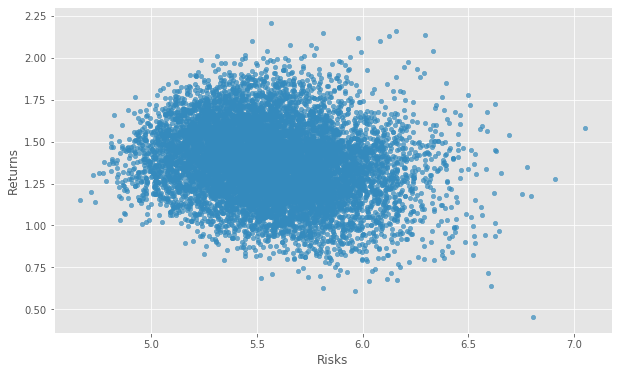

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
portfolios.plot.scatter(x='Risks', y='Returns', ax=ax, alpha=0.7)
plt.show()

In [27]:
sharpe = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Risks']).idxmax()]
sharpe

Returns    2.209607
Risks      5.567155
SBER.ME    0.021903
GAZP.ME    0.132395
MTSS.ME    0.032006
MGNT.ME    0.107682
SNGS.ME    0.056965
HYDR.ME    0.058857
AFLT.ME    0.007643
DSKY.ME    0.234576
AAPL       0.271126
IVV        0.076847
Name: 374, dtype: float64

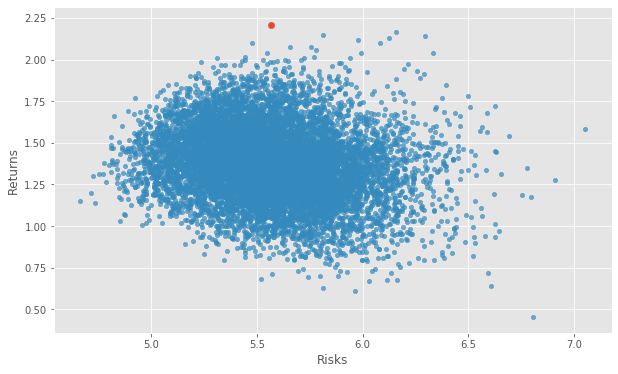

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
portfolios.plot(x='Risks', y='Returns', marker='o', kind='scatter', ax=ax, alpha=0.7)
plt.scatter(sharpe[1], sharpe[0], s=40)
plt.show()

MIT License

Copyright (c) 2021 Kirill Zakharov

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.